
# Project: TMDB 500 movies analysis (Investigate a Dataset) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. i am analyzing this data as part of my data analyts nanodegree on udacity.com. The data set  include data points such as user ratings, cast , directors, genre, revenue and so much more. 

Some Percrularities of the data set 
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.

### Questions for Analysis
Some Questions i would like to answer in my analysis include
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?
- what movies have the highest profit?
- what is the highest revenue generating genre?


In [2]:

#importing libraries
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section, I will Load the data and print out a few lines, Perform operations to inspect data
types and look for instances of missing or possibly errant data.
> **Tip**: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [3]:

# Reading in the data
movie_df = pd.read_csv('tmdb-movies.csv')

# Making a copy of the dataset
df = movie_df.copy()

# Loading the fist five rows in the dataset
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'tmdb-movies.csv'

## Data Cleaning 

### Columns of the dataset

In [4]:
# Observing the columns in the dataset
for i in df.columns:
    print(i)


id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


- The id and imdb_id columns both serve the same purpose, hence I will be dropping one of them (imdb_id)
- The homepage, tagline, keywords, overview columns are not necessary for analysis and would be dropped
- No currency was specified for the budget, revenue, budget_adj and revenue_adj columns, hence I would be using the US Dollar.

In [5]:
# Dropping unnecessary columns from the dataset
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

### Dimension of the dataset


In [6]:
# Checking the dimension of the data after dropping the columns
df.shape

(10866, 16)

- There are 10,866 rows and 16 columns in the dataset 

### Duplicated values

In [7]:
# Checking for duplicated values
df.duplicated().sum()

1

- There is a duplicated row in the dataset

In [8]:
# Dropping the duplicated row
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
# confirming that there is no duplicated rows for Quality assurance
df.duplicated().sum()

0

### Null Values

In [10]:
# Checking for null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are null values in the following columns:

- cast
- director
- genres
- production_companies

In order not to lose vital information that may be contained in these rows, I would be replacing the null values with 'Unknown'

In [11]:
#changing null values to unknown
df.fillna('Unknown', inplace=True)

In [13]:
# # confirming that there are no more null values for Quality assurance
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Checking data types

In [14]:
# Checking to ensure that the data types are cast correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

- The release date is cast as an object (string), hence I would be changing it to the datetime format

In [15]:
#changing release date to datetime format 
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
# checking that the release date is now in datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10865 non-null  object        
 6   director              10865 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10865 non-null  object        
 9   production_companies  10865 non-null  object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

### Empty values

Empty strings(objects) in a dataset will not be represented as null values in pandas. It is important to check for them separately.

In [18]:
# Checking for empty values in the dataset
for i in df.columns:
    for row, value in enumerate(df[i]):
        if value == ' ':
            print(f'Empty value found on row: {row}')

- No empty values found in the dataset

In [19]:
# viewing cleaned and Final dataset
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  What is the runtime distribution of the data set?

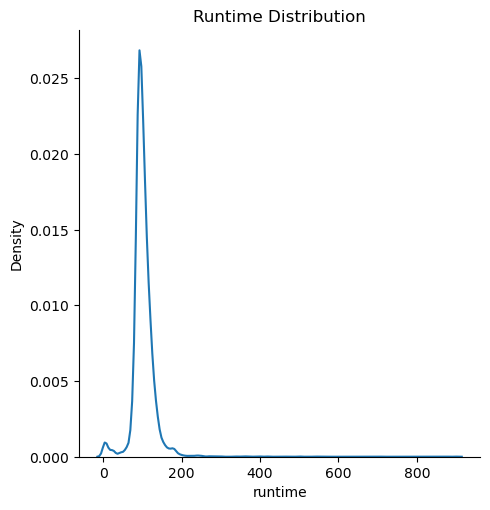

In [27]:
#checking the runtime distribution of the datasetbn
sns.displot(data=df, x='runtime', kind='kde')
plt.title('Runtime Distribution');

- The above plot is right skewed. This shows that most movies have a runtime of between 0 - 200 mins

### Research Question 2:  Which genres are most popular from year to year?

In [29]:
df_genres = df['genres'].value_counts().reset_index()
df_genres.head(20)

,index,genres
0,Comedy,712
1,Drama,712
2,Documentary,312
3,Drama|Romance,289
4,Comedy|Drama,280
5,Comedy|Romance,268
6,Horror|Thriller,259
7,Horror,253
8,Comedy|Drama|Romance,222
9,Drama|Thriller,138


The most popular genres are:

- Comedy
- Drama
- Documentary
- Drama|Romance
- Comedy|Drama



### Research Question 3: What kinds of properties are associated with movies that have high revenues?

In [30]:
# Getting the numerical columns in the dataset
numerical_df = df.select_dtypes(exclude ='object')

# Dropping 'budget_adj' and 'revenue_adj' columns as they basically are the same with budget and revenue.
# Also dropping 'release_date' as it is not an integer or a float, as well as 'id' as it is irrelevant
numerical_df.drop(['id', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
numerical_df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average
0,32.985763,150000000,1513528810,124,5562,6.5
1,28.419936,150000000,378436354,120,6185,7.1
2,13.112507,110000000,295238201,119,2480,6.3
3,11.173104,200000000,2068178225,136,5292,7.5
4,9.335014,190000000,1506249360,137,2947,7.3


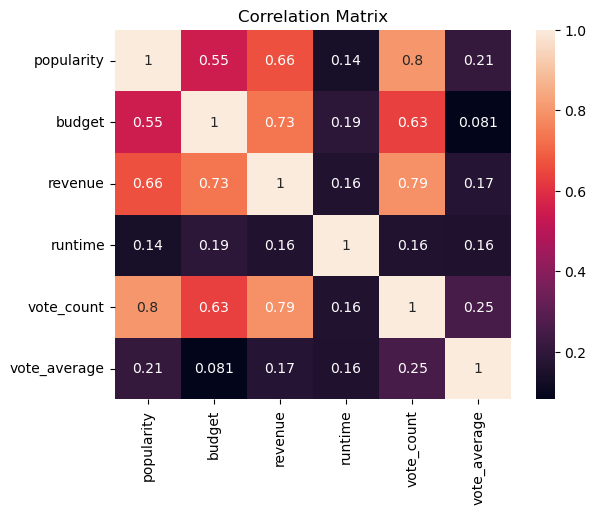

In [31]:
# Plotting the correlation matrix
plt.figure(dpi=100)
sns.heatmap(numerical_df.corr(), annot = True)
plt.title('Correlation Matrix');

From the correlation matrix above, the following can be observed:

- Popularity is highly correlated with vote_count. This means that higher vote counts are found among more popular movies.
- Budget is highly correlated with revenue. This means that the higher a movie's budget, the more likely it is to generate a higher revenue.
- Revenue is highly correlated to vote_count. This makes sense because vote_count is highly correlated with popularity and by extension revenue would more likely be higher among popular movies.

Therefore, movies that have high revenues have higher vote_counts, higher budgets and higher popularity

### Research Question 4: - what is the highest revenue generating genre? 

In [33]:
# Top 10 genres by revenue
revenue_df = df.nlargest(10, ['revenue'])

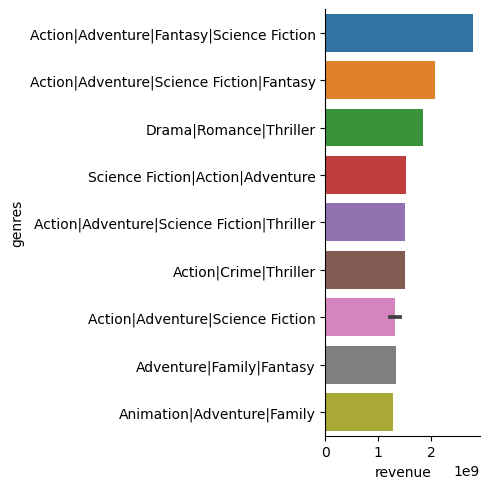

In [36]:
sns.catplot(data=revenue_df, x= 'revenue' , y= 'genres' , kind='bar');

From here we can see that a movie with genre mixing is the most popular genre by revenue

### Research Question 5:  What movies have the highest profit?

In [37]:
# Creating a new column called 'profit'
df['profit'] = df['revenue'] - df['budget']

In [38]:
# Getting the top 10 genres by profit
profit_df = df.nlargest(10, ['profit'])
profit_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


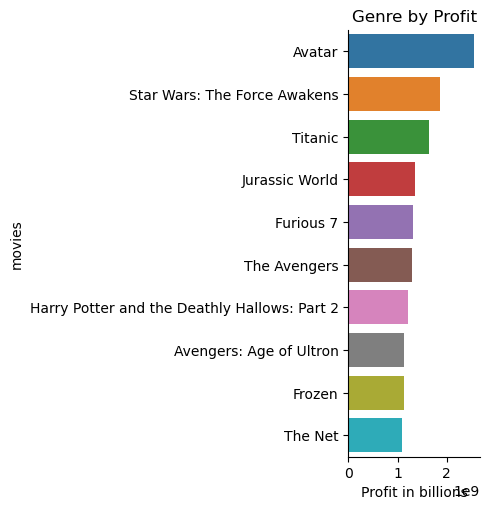

In [48]:
sns.catplot(data=profit_df, x='profit', y='original_title', kind='bar');
plt.title('Genre by Profit')
plt.xlabel('Profit in billions')
plt.ylabel('movies');

From here we can see that avatar is the most popular movie making over 2.5B revenue.

<a id='conclusions'></a>
## Conclusions

From this data set, starting with the correlation matrix above, the following can be observed:

- Popularity is highly correlated with vote_count. This means that higher vote counts are found among more popular movies.
- Budget is highly correlated with revenue. This means that the higher a movie's budget, the more likely it is to generate a higher revenue.
- Revenue is highly correlated to vote_count. This makes sense because vote_count is highly correlated with popularity and by extension revenue would more likely be higher among popular movies.

Therefore, movies that have high revenues have higher vote_counts, higher budgets and higher popularity

I analyzed the top 10 genres, average runtime, the most popular generes and  top profit generating movie

Avatar movie stood out as the top profit and revenue generating movie which i thought was interesting as comedy was the most popular genre. 

Lastly, it looks like high budget also creates a likelihood of high revenues. This is probably because the high budget allows filmmakers to get the best actors and the best equipment and props to make the movie very good.

### Limitations
There were a lot of mixed genre movies which toped the revue chart which made it difficult to obtain the single toping genre from the data set.



## Submitting my Project


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])